<a href="https://colab.research.google.com/github/amutebe/alexmutebe.github.io/blob/main/MACHINE%20LEARNING/UNIT%206/K_Means_Clustering_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# chnage directory
%cd /content/drive/MyDrive/ESSEX/ML/UNIT 6/

/content/drive/MyDrive/ESSEX/ML/UNIT 6


Importing Iris data in CSV


In [5]:
df = pd.read_csv("Unit06 iris.csv")

EDA

In [ ]:
df.head()

In [15]:
# tabulation for species

species_counts = df['species'].value_counts()
print(species_counts)


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
df.info()


In [17]:
# Check the percentages of missing value

df.isnull().sum() / df.shape[0] * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [21]:
#Descriptives for df

df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
wcss_values = []
for k in range(1, 5):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df.drop('species', axis=1))
    #kmeans.fit(df.drop('species', axis=1))
    wcss_values.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elbow curve

In [23]:
print(wcss_values)

[862.3177333333334, 316.5565537730244, 97.73604338235293, 57.317873214285704]


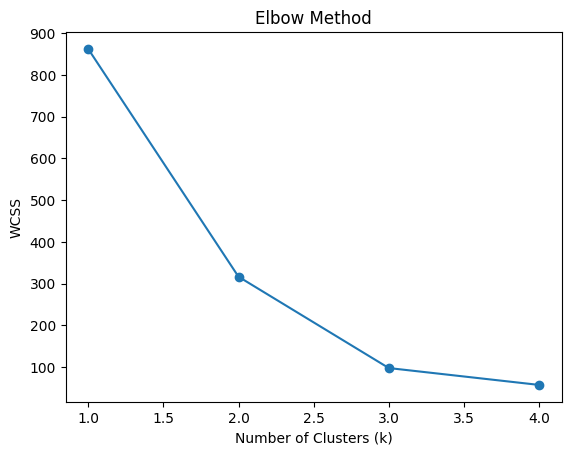

In [24]:
plt.plot(range(1, 5), wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [25]:
# prompt: perform  k means clustering

kmeans_model = KMeans(n_clusters=3, random_state=1)
kmeans_model.fit(df.drop('species', axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

From the visualization, we can see that the optimal number of clusters should be around 3. This is where the graph starts to resemble an “elbow.”

In [26]:
# Upon clustering at K = 3, checking how much similar the three clusters are as compared to the labels of species – setosa, versicolour, and verginica.


# Creating a new column with cluster labels
df['cluster'] = kmeans_model.labels_




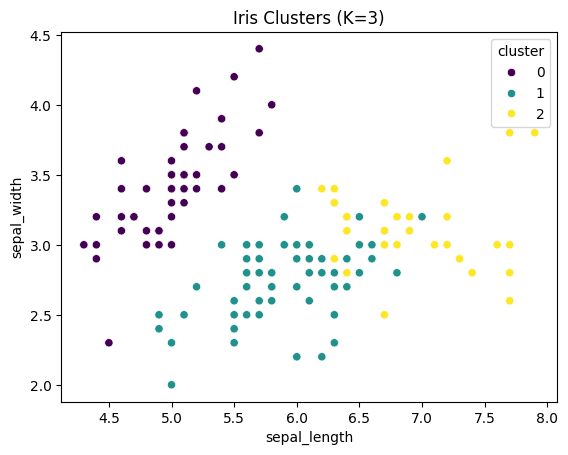

In [27]:
# Optional: Plotting the clusters
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='cluster', palette='viridis')
plt.title('Iris Clusters (K=3)')
plt.show()

In [28]:
# Creating a crosstab to check the distribution of species in each cluster
pd.crosstab(df['cluster'], df['species'])

species,setosa,versicolor,virginica
cluster,,,
0,50,0,0
1,0,50,18
2,0,0,32


Observations:
With K=3
Setosa classification is at 100% accurate rate
Versicolor only 2 were misclassified 100% accuracy rate
Virginica has highest misclassification at 64% accuracy rate

This means that the clustering is very accurate for setosa and versicolor, but less accurate for virginica.

To quantify this, we can calculate the accuracy for each species:

- Setosa: 100% (50/50)
- Versicolor: 100% (50/50)
- Virginica: 64% (32/50)

Overall, the clustering is quite good, with an average accuracy of 88%.